In [2]:
# import packages

import ismn
from ismn.interface import ISMN_Interface
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
import numpy as np

# Collect data

In [4]:
# Extract global dataset
data_path = r"M:\Projects\CCIplus_Soil_Moisture\08_scratch\20240807_rzsm_johanna\Global_Data_separate_files_header_19780101_20240805_11386_6PDC_20240805.zip"
ds = ISMN_Interface(data_path, parallel=True)

This may take a few minutes, but is only done once...



Stations Processed: 100%|██████████| 3122/3122 [17:33<00:00,  2.96it/s]


Metadata collection finished after 1054 Seconds.
Metadata for this archive and Logfile stored in M:\Projects\CCIplus_Soil_Moisture\08_scratch\20240807_rzsm_johanna\python_metadata
Using the existing ismn metadata in M:\Projects\CCIplus_Soil_Moisture\08_scratch\20240807_rzsm_johanna\python_metadata\Global_Data_separate_files_header_19780101_20240805_11386_6PDC_20240805.csv to set up ISMN_Interface. 
If there are issues with the data reader, you can remove the metadata csv file to repeat metadata collection.


WARNING - 2024-08-07 12:11:35,119: Sensor already exists: GPS_soil_moisture_0.000000_0.050000
WARNING - 2024-08-07 12:11:35,119: Sensor already exists: GPS_soil_moisture_0.000000_0.050000
WARNING - 2024-08-07 12:11:35,162: Sensor already exists: Hydraprobe-Analog-(2.5-Volt)_soil_moisture_0.050800_0.050800
WARNING - 2024-08-07 12:11:35,162: Sensor already exists: Hydraprobe-Analog-(2.5-Volt)_soil_moisture_0.203200_0.203200
WARNING - 2024-08-07 12:11:35,164: Sensor already exists: Hydraprobe-Analog-(2.5-Volt)_soil_moisture_0.508000_0.508000
WARNING - 2024-08-07 12:11:35,164: Sensor already exists: Hydraprobe-Analog-(2.5-Volt)_soil_moisture_0.050800_0.050800
WARNING - 2024-08-07 12:11:35,164: Sensor already exists: Hydraprobe-Analog-(2.5-Volt)_soil_moisture_0.203200_0.203200
WARNING - 2024-08-07 12:11:35,164: Sensor already exists: Hydraprobe-Analog-(2.5-Volt)_soil_moisture_0.508000_0.508000


In [27]:
# ds

In [18]:
ds[0][0][0].metadata.to_pd()['variable']

key
val           soil_moisture
depth_from              0.0
depth_to               0.05
Name: data, dtype: object

# Functionalities ismn package

## Metadata overview

In [35]:
ds.metadata.head(3)

variable clay_fraction                climate_KG               climate_insitu  \
key         depth_from depth_to   val depth_from depth_to  val     depth_from   
0                  0.0      0.3  11.0        NaN      NaN  BSk            NaN   
1                  0.0      0.3  55.0        NaN      NaN  BSk            NaN   
2                  0.0      0.3  55.0        NaN      NaN  BSk            NaN   

variable                    elevation  ... timerange_from                      \
key      depth_to      val depth_from  ...       depth_to                 val   
0             NaN  unknown        NaN  ...            NaN 2010-01-20 03:00:00   
1             NaN  unknown        NaN  ...            NaN 2010-01-20 11:00:00   
2             NaN  unknown        NaN  ...            NaN 2010-01-24 20:00:00   

variable timerange_to                                variable           \
key        depth_from depth_to                 val depth_from depth_to   
0                 NaN      NaN 2010-01-22 00:00:00        0.0     0.05   
1                 NaN      NaN 2010-01-22 08:00:00        0.0     0.05   
2                 NaN      NaN 2010-01-24 23:00:00        0.0     0.05   

variable                                                         file_path  \
key                 val                                                val   
0         soil_moisture  AACES/Farm01/AACES_AACES_Farm01_sm_0.000000_0....   
1         soil_moisture  AACES/Farm02/AACES_AACES_Farm02_sm_0.000000_0....   
2         soil_moisture  AACES/Farm03/AACES_AACES_Farm03_sm_0.000000_0....   

variable      file_type  
key                 val  
0         header_values  
1         header_values  
2         header_values  

[3 rows x 62 columns]

## Finding the nearest station

In [19]:
# Find the nearest station

grid = ds.collection.grid
gpis, lons, lats, _ = grid.get_grid_points()
pd.DataFrame(index=pd.Index(gpis, name='gpi'), 
             data={'lon': lons, 'lat': lats}).T

gpi,0,1,2,3,4,5,6,7,8,9,...,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121
lon,143.66369,143.89634,144.31351,144.43211,144.79570,145.47188,145.41483,146.07833,145.99335,146.58227,...,-106.9082,-106.79248,-107.09040,-107.3414,-106.57380,-106.7983,-106.7986,-106.9075,-106.79825,-107.22260
lat,-34.77682,-34.77832,-34.65276,-34.74041,-35.03008,-34.67459,-34.95988,-34.65475,-34.95354,-34.90187,...,39.2335,39.00833,39.37939,39.5442,39.10711,39.1700,39.1706,39.2239,39.20350,39.47212


In [24]:
# Using the GPI or coordinates, a station from **all** stations in **all** networks in the collection can be selected.
station, dist = ds.collection.get_nearest_station(28.0, 68.0)
print(f'Station {station.name} is {int(dist)} metres away from the passed coordinates:')
# assert ds.collection.station4gpi(0) == station # same result when selecting with GPI

Station SAA111 is 41285 metres away from the passed coordinates:


## Find network for a specific station

In [26]:
network = ds.network_for_station('SAA111', name_only=False)
display(network)
display(network[0][0].data.head(3))

Network 'FMI' with Stations: ['SAA111', 'SAA112', 'SAA120', 'SOD011', 'SOD012', 'SOD013', 'SOD021', 'SOD022', 'SOD023', 'SOD031', 'SOD032', 'SOD033', 'SOD071', 'SOD072', 'SOD073', 'SOD081', 'SOD082', 'SOD083', 'SOD091', 'SOD092', 'SOD093', 'SOD101', 'SOD102', 'SOD103', 'SOD130', 'SOD140', 'SODAWS']

,soil_moisture,soil_moisture_flag,soil_moisture_orig_flag
date_time,,,
2012-10-14 00:00:00,0.180,D02,M
2012-10-14 01:00:00,0.180,D02,M
2012-10-14 02:00:00,0.179,D02,M


## Selecting and reading specific sensors

In [46]:
ds.metadata.head(1)

print(ds.metadata['variable'].head(3))
print(ds.metadata['clay_fraction'].head(3))



key  depth_from  depth_to            val
0           0.0      0.05  soil_moisture
1           0.0      0.05  soil_moisture
2           0.0      0.05  soil_moisture
key  depth_from  depth_to   val
0           0.0       0.3  11.0
1           0.0       0.3  55.0
2           0.0       0.3  55.0


In [56]:
# check out how many unique values there are
ds.metadata['variable'].val.nunique()
ds.metadata['variable'].val.value_counts()

ds.metadata['instrument'].depth_to.nunique()
ds.metadata['instrument'].depth_to.value_counts()


depth_to
0.0500    1510
0.1000    1485
0.2000    1223
0.2032     797
0.5080     779
          ... 
1.1430       1
0.9398       1
0.9906       1
0.4600       1
1.8000       1
Name: count, Length: 115, dtype: int64

In [60]:
ids = ds.get_dataset_ids(variable='soil_moisture', 
                                max_depth=1, 
                                filter_meta_dict={'lc_2005': 130, 'climate_KG': 'Csb'})
print(ids)

# or

conditions = (ds.metadata['variable'].val == 'soil_moisture') & \
             (ds.metadata['instrument'].depth_to <= 1) & \
             (ds.metadata['lc_2005'].val == 130) & \
             (ds.metadata['climate_KG'].val == 'Csb') 

print(ds.metadata[conditions].index.to_list())

[2222, 2223, 2224, 2225, 2226, 2227, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 4885, 4917, 4923, 4942, 4965, 4972, 4981, 4988, 5005, 5013, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8976, 8977, 8978, 9088, 9089, 9090, 9091, 11252, 11253, 11254, 11255, 11256]
[2222, 2223, 2224, 2225, 2226, 2227, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 4885, 4917, 4923, 4942, 4965, 4972, 4981, 4988, 5005, 5013, 8103, 8104, 8105, 8106, 8107, 8108, 8109, 8110, 8976, 8977, 8978, 9088, 9089, 9090, 9091, 11252, 11253, 11254, 11255, 11256]


In [63]:
conditions = (ds.metadata['variable'].val == 'soil_moisture') & \
             (ds.metadata['instrument'].depth_to >= 1) & \
             (ds.metadata['lc_2005'].val == 130) & \
             (ds.metadata['climate_KG'].val == 'Csb') 

ids = ds.metadata[conditions].index.to_list()
print(ids)

[2227, 2287, 2293, 9092, 11256]


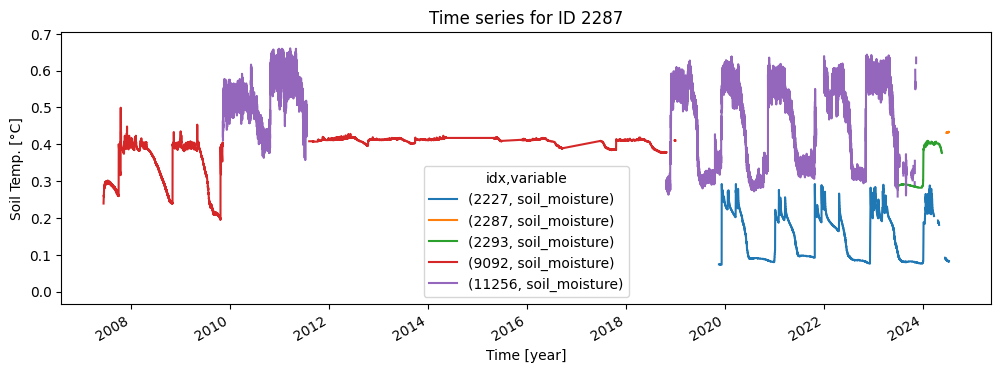

In [64]:
# use the found IDs to read data from the according sensors

ts, meta = ds.read(ids, return_meta=True)
ax = ts.plot(figsize=(12,4), title=f'Time series for ID {ids[1]}', xlabel="Time [year]", ylabel="Soil Temp. [°C]")

## Plot station locations

In [67]:
import cartopy.crs as ccrs

ImportError: Optional dependencies missing: `matplotlib` and/or `cartopy`. Please run `conda install -c conda-forge matplotlib cartopy` to use this feature.

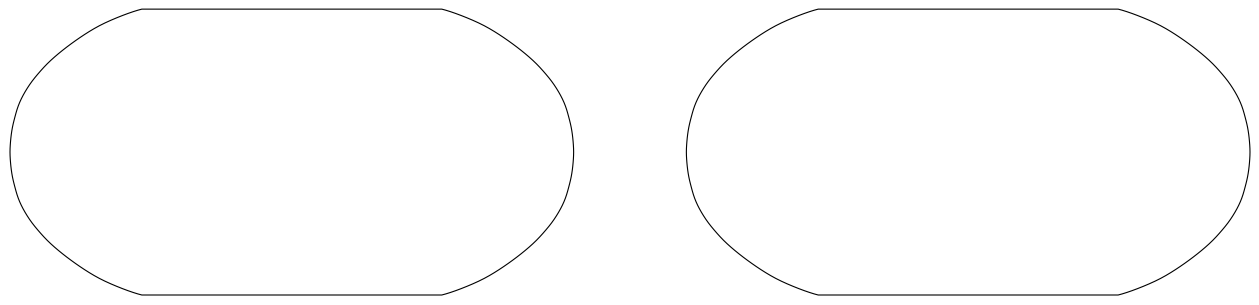

In [68]:
#plot available station on a map
fig, axs = plt.subplots(1, 2, figsize=(16,10), subplot_kw={'projection': ccrs.Robinson()})
ds.plot_station_locations('soil_moisture', min_depth=0., max_depth=0.1, ax=axs[0], markersize=5, text_scalefactor=2)
ds.plot_station_locations('soil_temperature', min_depth=0.5, ax=axs[1], markersize=5, text_scalefactor=3)
axs[0].set_extent([-10, 35, 34, 71])
axs[1].set_extent([-10, 35, 34, 71])
plt.show()

## Selecting and iterating over sensors

### select by variable and depth

Network 'AACES' with Stations: ['Farm01', 'Farm02', 'Farm03', 'Farm04', 'Farm06', 'Farm07', 'Farm08', 'Farm09', 'Farm10', 'Farm11', 'Farm12', 'Farm13', 'Farm14', 'Farm15', 'Farm16', 'Farm17', 'Farm18', 'Farm19', 'Farm20', 'Station01', 'Station02', 'Station05', 'Station06', 'Station07', 'Station08', 'Station09', 'Station10', 'Station11', 'Station12', 'Station13', 'Station14', 'Station15', 'Station16', 'Station17', 'Station18', 'Station19', 'Station20', 'Station25', 'Station26', 'Station27', 'Station28', 'Station29', 'Station30', 'Station31', 'Station32', 'Station34', 'Station36', 'Station37', 'Station39']

Station 'Farm01' with Sensors: ['ThetaProbe-ML2X_soil_moisture_0.000000_0.050000']

ThetaProbe-ML2X_soil_moisture_0.000000_0.050000

Metadata for sensor ThetaProbe-ML2X_soil_moisture_0.000000_0.050000:


variable        key       
clay_fraction   val                          11.0
                depth_from                    0.0
                depth_to                      0.3
climate_KG      val                           BSk
climate_insitu  val                       unknown
elevation       val                          72.0
instrument      val               ThetaProbe-ML2X
                depth_from                    0.0
                depth_to                     0.05
latitude        val                     -34.77682
lc_2000         val                           120
lc_2005         val                           120
lc_2010         val                           120
lc_insitu       val                       unknown
longitude       val                     143.66369
network         val                         AACES
organic_carbon  val                          0.52
                depth_from                    0.0
                depth_to                      0.3
sand_fraction   val    

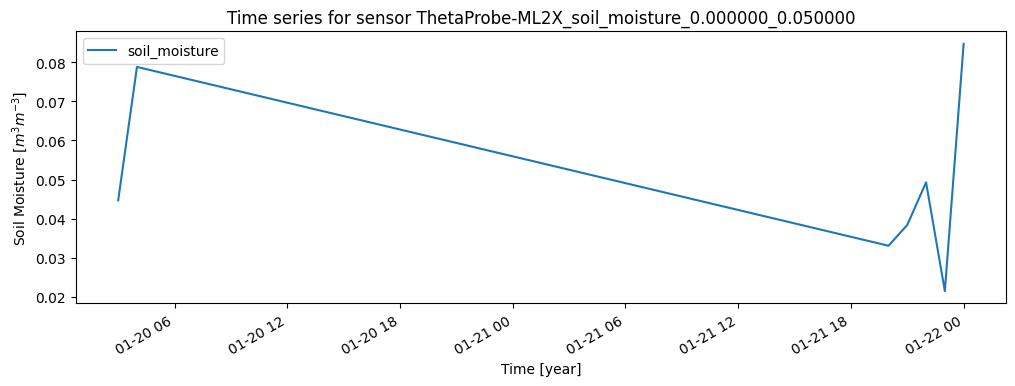

In [69]:
for network, station, sensor in ds.collection.iter_sensors(variable='soil_moisture', 
                                                                  depth=[0., 0.05]):
    display(network)
    display(station)
    display(sensor)

    print('\033[1m' + f'Metadata for sensor {sensor}:'+ '\033[0m')
    display(sensor.metadata.to_pd())
    ax = sensor.data.plot(figsize=(12,4), title=f'Time series for sensor {sensor.name}')
    ax.set_xlabel("Time [year]")
    ax.set_ylabel("Soil Moisture [$m^3 m^{-3}$]")
    break  # for this example we stop after the first sensor

### Selecting by variable and other metadata

In [71]:
ds.print_landcover_dict()

CCI Landcover Classification
----------------------------
Cropland, rainfed: 10
Cropland, rainfed / Herbaceous cover: 11
Cropland, rainfed / Tree or shrub cover: 12
Cropland, irrigated or post-flooding: 20
Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous: 30
Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%): 40
Tree cover, broadleaved, evergreen, Closed to open (>15%): 50
Tree cover, broadleaved, deciduous, Closed to open (>15%): 60
Tree cover, broadleaved, deciduous, Closed (>40%): 61
Tree cover, broadleaved, deciduous, Open (15-40%): 62
Tree cover, needleleaved, evergreen, closed to open (>15%): 70
Tree cover, needleleaved, evergreen, closed (>40%): 71
Tree cover, needleleaved, evergreen, open (15-40%): 72
Tree cover, needleleaved, deciduous, closed to open (>15%): 80
Tree cover, needleleaved, deciduous, closed (>40%): 81
Tree cover, needleleaved, deciduous, open (15-40%): 82
Tree cover, mixed leaf type (broadleaved and needleleave

Station 'Barlad' with Sensors: ['5TM_soil_moisture_0.000000_0.050000']

5TM_soil_moisture_0.000000_0.050000

Metadata for sensor 5TM_soil_moisture_0.000000_0.050000:


variable        key       
clay_fraction   val                          25.0
                depth_from                    0.0
                depth_to                      0.3
climate_KG      val                           Dfb
climate_insitu  val                       unknown
elevation       val                         172.0
instrument      val                           5TM
                depth_from                    0.0
                depth_to                     0.05
latitude        val                      46.23313
lc_2000         val                            10
lc_2005         val                            10
lc_2010         val                            10
lc_insitu       val                       unknown
longitude       val                      27.64438
network         val                          RSMN
organic_carbon  val                          1.65
                depth_from                    0.0
                depth_to                      0.3
sand_fraction   val    

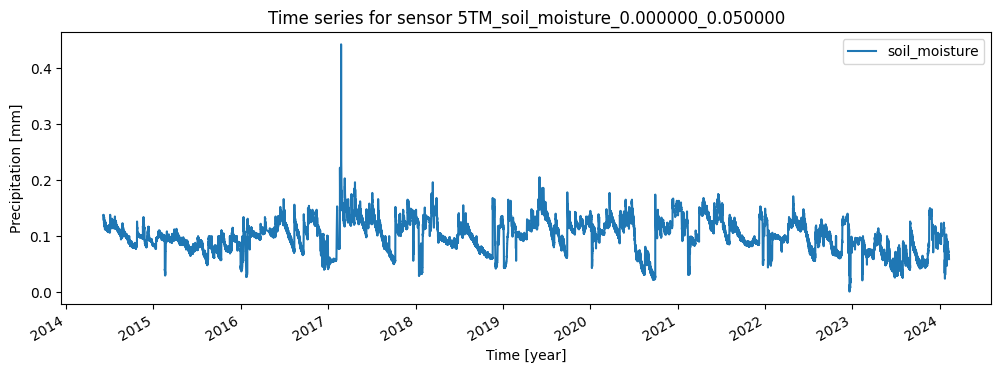

In [78]:
for station, sensor in ds['RSMN'].iter_sensors(variable='soil_moisture', 
                                                      filter_meta_dict={'lc_2010': [10, 130]}):
    display(station)
    display(sensor)
    
    data = sensor.read_data()
    metadata = sensor.metadata
    
    print('\033[1m' + f'Metadata for sensor {sensor}:' + '\033[0m')
    display(metadata.to_pd())
    ax = data.plot(figsize=(12,4), title=f'Time series for sensor {sensor.name}')
    ax.set_xlabel("Time [year]")
    ax.set_ylabel("Precipitation [mm]")
    break # for this example we stop after the first sensor

### Selecting by variable, depth and metdata

In [80]:
ds.print_climate_dict()

KOEPPEN GEIGER Climate Classification
-------------------------------------
Af  : Tropical Rainforest
Am  : Tropical Monsoon
As  : Tropical Savanna Dry
Aw  : Tropical Savanna Wet
BWk : Arid Desert Cold
BWh : Arid Desert Hot
BWn : Arid Desert With Frequent Fog
BSk : Arid Steppe Cold
BSh : Arid Steppe Hot
BSn : Arid Steppe With Frequent Fog
Csa : Temperate Dry Hot Summer
Csb : Temperate Dry Warm Summer
Csc : Temperate Dry Cold Summer
Cwa : Temperate Dry Winter, Hot Summer
Cwb : Temperate Dry Winter, Warm Summer
Cwc : Temperate Dry Winter, Cold Summer
Cfa : Temperate Without Dry Season, Hot Summer
Cfb : Temperate Without Dry Season, Warm Summer
Cfc : Temperate Without Dry Season, Cold Summer
Dsa : Cold Dry Summer, Hot Summer
Dsb : Cold Dry Summer, Warm Summer
Dsc : Cold Dry Summer, Cold Summer
Dsd : Cold Dry Summer, Very Cold Winter
Dwa : Cold Dry Winter, Hot Summer
Dwb : Cold Dry Winter, Warm Summer
Dwc : Cold Dry Winter, Cold Summer
Dwd : Cold Dry Winter, Very Cold Winter
Dfa : Cold Dry

Network 'AACES' with Stations: ['Farm01', 'Farm02', 'Farm03', 'Farm04', 'Farm06', 'Farm07', 'Farm08', 'Farm09', 'Farm10', 'Farm11', 'Farm12', 'Farm13', 'Farm14', 'Farm15', 'Farm16', 'Farm17', 'Farm18', 'Farm19', 'Farm20', 'Station01', 'Station02', 'Station05', 'Station06', 'Station07', 'Station08', 'Station09', 'Station10', 'Station11', 'Station12', 'Station13', 'Station14', 'Station15', 'Station16', 'Station17', 'Station18', 'Station19', 'Station20', 'Station25', 'Station26', 'Station27', 'Station28', 'Station29', 'Station30', 'Station31', 'Station32', 'Station34', 'Station36', 'Station37', 'Station39']

Station 'Farm13' with Sensors: ['ThetaProbe-ML2X_soil_moisture_0.000000_0.050000']

ThetaProbe-ML2X_soil_moisture_0.000000_0.050000

Metadata for sensor ThetaProbe-ML2X_soil_moisture_0.000000_0.050000:


variable        key       
clay_fraction   val                          11.0
                depth_from                    0.0
                depth_to                      0.3
climate_KG      val                           Cfa
climate_insitu  val                       unknown
elevation       val                         224.0
instrument      val               ThetaProbe-ML2X
                depth_from                    0.0
                depth_to                     0.05
latitude        val                     -34.78724
lc_2000         val                            10
lc_2005         val                            10
lc_2010         val                            10
lc_insitu       val                       unknown
longitude       val                     147.13559
network         val                         AACES
organic_carbon  val                          0.39
                depth_from                    0.0
                depth_to                      0.3
sand_fraction   val    

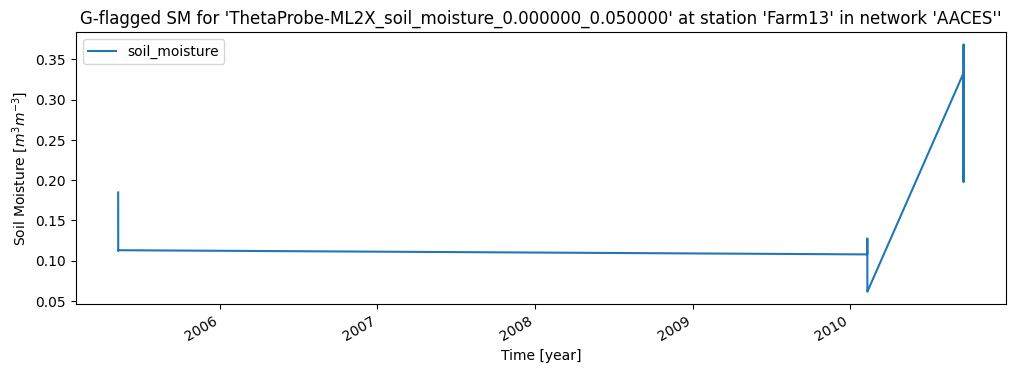

In [84]:
from ismn.meta import Depth
for network, station, sensor in ds.collection \
    .iter_sensors(variable='soil_moisture',
                  depth=Depth(0.,0.05),
                  filter_meta_dict={'lc_2010': [10, 130],
                                    'climate_KG':['Csc', 'Cfa', 'Dfc']}):
    
    display(network)
    display(station)
    display(sensor)
    
    data = sensor.read_data()
    data.loc[data['soil_moisture_flag'] != 'G', 'soil_moisture'] = np.nan
    metadata = sensor.metadata

    print('\033[1m' + f'Metadata for sensor {sensor}:'+ '\033[0m')
    display(metadata.to_pd())
    ax = data.plot(figsize=(12,4), title=f"G-flagged SM for '{sensor.name}' at station '{station.name}' in network '{network.name}''")
    ax.set_xlabel("Time [year]")
    ax.set_ylabel("Soil Moisture [$m^3 m^{-3}$]")
    break # for this example we stop after the first sensor

### Creating subset interface

In [85]:
metadata = ds.metadata[ds.metadata[('variable', 'val')] == 'soil_moisture']
np.random.seed(123)
ids = np.random.choice(metadata.index, 10)
subset = ds.subset_from_ids(ids)
subset

Using the existing ismn metadata in M:\Projects\CCIplus_Soil_Moisture\08_scratch\20240807_rzsm_johanna\python_metadata\Global_Data_separate_files_header_19780101_20240805_11386_6PDC_20240805.csv to set up ISMN_Interface. 
If there are issues with the data reader, you can remove the metadata csv file to repeat metadata collection.


ismn.base.IsmnRoot Zip at M:\Projects\CCIplus_Soil_Moisture\08_scratch\20240807_rzsm_johanna\Global_Data_separate_files_header_19780101_20240805_11386_6PDC_20240805.zip
with Networks[Stations]:
------------------------
  ICN: ['OrrCenter(Perry)'],
  USCRN: ['Wolf-Point-29-ENE'],
  CHINA: ['TIANSHUI'],
  RISMA: ['MB13'],
  SCAN: ['WearyLake', 'SanAngelo', 'BraggFarm'],
  SOILSCAPE: ['Ararimu-2601'],
  RUSWET-AGRO: ['Turgaj#1'],
  AMMA-CATCH: ['Nalohou-Mid']

ImportError: Optional dependencies missing: `matplotlib` and/or `cartopy`. Please run `conda install -c conda-forge matplotlib cartopy` to use this feature.

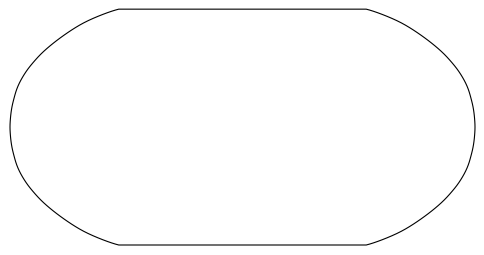

In [87]:
import cartopy.crs as ccrs
#plot available station on a map
fig, ax = plt.subplots(1, 1, figsize=(6,10), subplot_kw={'projection': ccrs.Robinson()})
subset.plot_station_locations(ax=ax, markersize=7, text_scalefactor=3)
ax.set_extent([-10, 35, 34, 71])
plt.show()